# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 2

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **26 февраля в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

In [1]:
import numpy as np
import scipy.stats as sps
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

## Задача 1.

Рассмотрим данные исследования 2004 года о зависимости риска развития диабета от пола, возраста, индекса массы тела, среднего кровяного давления и других показателей. 

Функция `sklearn.datasets.load_diabetes()` возвращает словарь. В поле `data` записана матрица регрессоров, в которой данные предварительно центрированы и нормированы. В поле `target` записана мера прогрессирования заболевания в течении года. В поле `DESCR` можно прочитать подробнее о данных.

### Загрузка данных

In [2]:
data = load_diabetes()

Посмотрим на описание датасета.

In [3]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

Поле `data` содержит матрицу размера 442 $\times$ 10, где 442 — количество пациентов, а 10 — количество признаков (возраст, пол, и т.д.). 
Строки матрицы соответствуют пациентам, столбцы — признакам.

In [4]:
data['data'].shape

(442, 10)

Целевая переменная $-$ мера прогрессирования заболевания в течении года.


In [5]:
data['target'].shape

(442,)

Создайте матрицу регрессоров $X$ и столбец наблюдений $y$.

In [6]:
X, y = data['data'], data['target']

### Обучение моделей

Разбейте данные случайно на две части — обучающую и тестовую в соотношении 80:20.

Если что-то забыли или что-то не понятно, можно почитать справку:

In [7]:
train_test_split?

Signature: train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the
 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


Заведите модель линейной регрессии из `sklearn` и обучите ее по обучающей части данных.

In [9]:
model = LinearRegression()
model = model.fit(X, y)

Выведите кооэффициенты модели, включая свободный член.

In [10]:
model.coef_ 


array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [11]:
model.intercept_

152.1334841628965

Посчитайте предсказания построенной модели на тестовой выборке

In [12]:
y_pred = model.predict(X_test)
print(y_pred)

[146.64621068 174.7240982  142.31366526 284.13478714 124.51427625
  99.14026374 257.23616403 192.3231713   97.80241129 114.24162642
 100.70869427 166.82129568  57.49473392 207.99651918 103.56829281
 129.8448476  221.77623752 244.30370588 191.16674356 214.02871163
 213.58408893  89.83382843  72.73252701 189.19307553 158.71515746
 155.50813249 183.50018707 172.85184399  52.60848094 113.0351432
 172.14848891  91.00741773 136.93372685 182.64959461 172.55362727
 199.27952034 127.75408702 124.02443772 148.49621551  58.62043851
  73.91315064 105.20931175 159.9389204  148.37816611 177.26966106
  63.27214662  77.05921006 112.81897436  52.53953733 170.67482041
 150.50201654  69.84529943  95.1016223  109.99647408 177.17236996
 152.75856279  98.75498537 206.11706979 124.01702527  80.48200416
 191.53802295 207.8289973  140.4174259  106.9267784  133.61497308
 203.75145711 174.16816194 163.01389345 128.82725506 147.72187623
 186.39202728 198.06460718 235.18090808 145.63105805  76.79700486
 153.632106

Реализуйте метрики MSE, MAE, MAPE без использования `sklearn` и других готовых реализаций.

In [14]:
def mean_squared_error(y_true, y_pred):
    s = 0
    for i in range (len(y_pred)):
        s += (y_true[i] - y_pred[i]) ** 2
    return s / len(y_pred)

def mean_absolute_error(y_true, y_pred):
    s = 0
    for i in range (len(y_pred)):
        s += abs(y_true[i] - y_pred[i])
    return s / len(y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    s = 0
    for i in range (len(y_pred)):
        s += (abs(y_true[i] - y_pred[i])/ y_true[i])
    return s  / len(y_pred) * 100

Посчитайте MSE, MAE, MAPE на тестовой выборке и выведите с точностью до трех знаков после запятой.

In [15]:
print(f"MSE: {mean_squared_error(y_test, y_pred) :.3}")
print(f"MAE: {mean_absolute_error(y_test, y_pred) :.3}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred) :.3}%")

MSE: 2.77e+03
MAE: 42.2
MAPE: 37.4%


Постройте графики зависимости предсказания прогрессирования заболевания от различных признаков по отдельности. При работе с конкретным признаком полагайте значения остальных признаков равными средним значениям этих признаков на тестовой выборке.



Все графики нарисуйте в одном окне.



*Может помочь следующий код:*

`
copies = np.tile(a, k).reshape((k, -len(a))) 
` *создает $k$ копий массива `a` размера (`len(a)`, ).* 
*Размер полученной матрицы $k \times len(a)$.*

*Также рекомендуется изучить ноутбуки с занятий.*





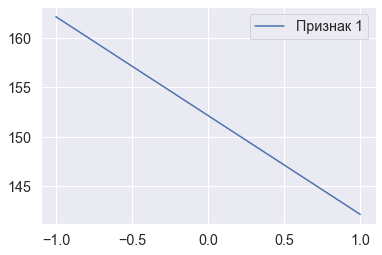

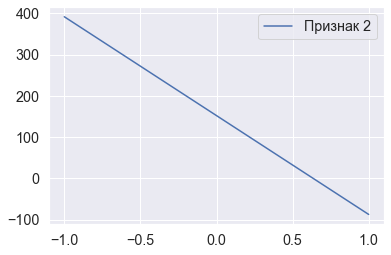

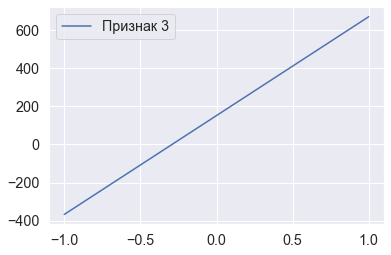

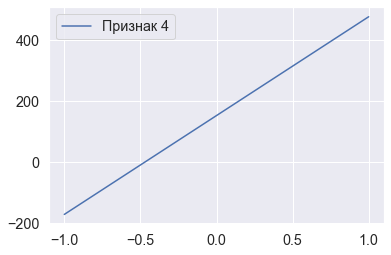

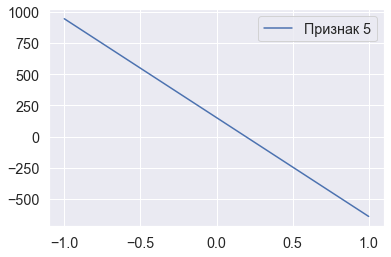

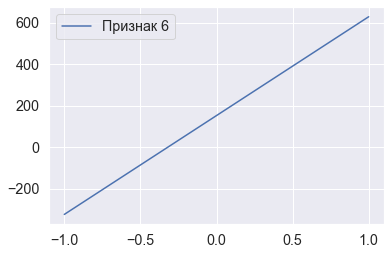

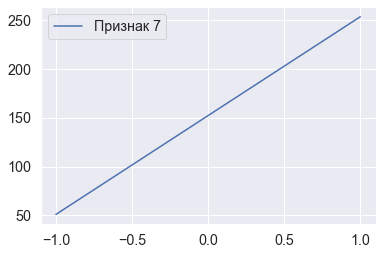

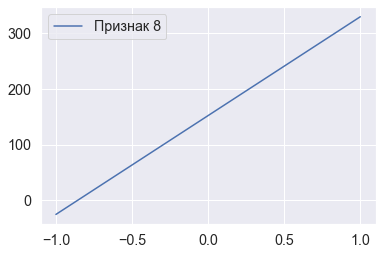

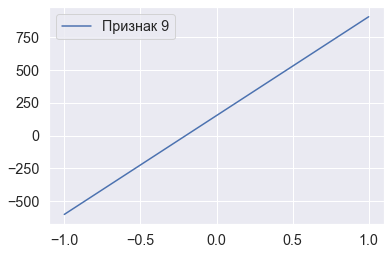

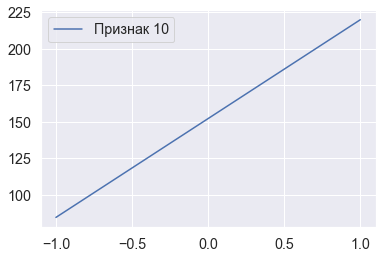

In [16]:
aver_values = [col.mean() for col in X.T]

for i in range (len(X.T)):
    c = model.intercept_ + sum([aver_values[j] * model.coef_[j] for j in range(len(X.T)) if j != i])
    x = np.array([j for j in range(-1000, 1000)]) / 1000
    y = c + x * model.coef_[i]
    s = "Признак " + str(i + 1) 
    plt.plot(x, y, label = s)
    plt.legend()
    plt.show()

### Своя реализация модели

Теперь реализуем линейную регрессию самостоятельно, используя формулы с лекции.
Вам нужно только заполнить прочерки в методах `fit` и `predict`.

In [17]:
class MyLinearRegression:
    """
    Класс, реализующий линейную регрессию c помощью МНК.
    """
    
    def __init__(self):
        pass
        
    def fit(self, X, Y):
        """
        Функция обучения модели. 
        
        Предполагается модель Y = X * theta + epsilon. 
        где X --- регрессор (матрица размера n x d), 
        Y --- отклик (матрица размера n x 1),
        epsilon-ы имеют нормальное распределение

        Обратите внимание, здесь нет intercept_
        """
        
        self.n, self.d = len(Y), len(X.T)
        
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
  
        return self
    
        
    def predict(self, X):
        """
        Возвращает предсказание отклика на новых объектах X 
        и опционально доверительный/предсказательный интервал.
        
        X --- матрица объектов размера n x d
                        
        """
        
        y_pred = X.dot(self.theta)
        return y_pred 

Обучите вашу модель на данных о диабете с добавлением свободного члена.
Распечатайте коэффициенты и сравните их с коэффициентами модели из `sklearn`.

In [18]:
my = MyLinearRegression()
# создаём массив с последним столбцом из единиц, который будет свободным членом
X_inter_train = np.column_stack((X_train, np.array([1 for i in range(len(X_train))]).T))
X_inter_test = np.column_stack((X_test, np.array([1 for i in range(len(X_test))]).T))
my_with_inter = my.fit(X_inter_train, y_train)
my_with_inter.theta, model.coef_, model.intercept_

(array([  37.90031426, -241.96624835,  542.42575342,  347.70830529,
        -931.46126093,  518.04405547,  163.40353476,  275.31003837,
         736.18909839,   48.67112488,  151.34565535]),
 array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
        -792.18416163,  476.74583782,  101.04457032,  177.06417623,
         751.27932109,   67.62538639]),
 152.1334841628965)

Теперь обучите модель без свободного члена.

In [19]:
my_without_inter = MyLinearRegression()
my_without_inter.fit(X_train, y_train)

Сравните качество моделей со свободным членом и без него на тестовой выборке.

In [20]:
print(f"MAPE with intercept: {mean_absolute_percentage_error(y_test, my_with_inter.predict(X_inter_test)) :.3}%")
print(f"MAPE without intecept: {mean_absolute_percentage_error(y_test, my_without_inter.predict(X_test)) :.3}%")

MAPE with intercept: 37.5%
MAPE without intecept: 1.28e+02%


Сделайте выводы.

Свободный член сильно влияет на точность модели, поэтому его важно учитывать. Но не всегда, так как например бывают случаи, когда точно известно, что в нуле значение ноль (как было в одной из лаб, где мы исследовали зависимость сопростивления проволоки от её длины, там точно известно, что в нуле должно быть нулевое значение). 

## Задача 2.

### Часть 1

Скачайте [датасет](https://www.kaggle.com/deepu1109/star-dataset) и распакуйте. Вы получите файл `6 class csv.csv`. 
Он представляет собой таблицу некоторых характеристик звезд, таких как температура, радиус и т.д..
В описании к датасету указаны следующие типы звезд:
* Brown Dwarf (0),
* Red Dwarf (1),
* White Dwarf (2),
* Main Sequence (3),
* Supergiant (4),
* Hypergiant (5).

На основании характеристик мы хотим классифицировать звезды по типу. 


In [21]:
data = pd.read_csv("6 class csv.csv")
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [22]:
data.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

Для классификации с помощью kNN будем использовать только столбцы с числовыми значениями. 
Целевая переменная (класс) находится в столбце Star type.

Разделите данные на признаки $X$ и целевую переменную $y$.

In [23]:
needed_columns = [
    'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'
]
X = np.array(data[needed_columns])
y = np.array(data['Star type'])

Разделите данные на тренировочную и тестовую выборки, `test_size` возьмите равным 0.3.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Заведите модель классификатора kNN из `sklearn`, параметр `n_neighbours` возьмите по умолчанию. Обучите модель на тренировочной выборке

In [25]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

Реализуйте метрику accuracy без использования `sklearn` и других ее готовых реализаций.

In [28]:
def accuracy_score(y_true, y_pred):
    s = 0
    for i in range (len(y_pred)):
        if (y_true[i] == y_pred[i]):
            s += 1
    return s / len(y_pred)

Посчитайте метрику качества по тренировочной и тестовой выборкам и выведите эти значения с точностью 4 знака после запятой.

In [29]:
print(f"accuracy_train {accuracy_score(y_train, model.predict(X_train)) :.4}")
print(f"accuracy_test {accuracy_score(y_test, model.predict(X_test)) :.4}")


accuracy_train 0.7321
accuracy_test 0.7083


#### Нормализация данных

Разные столбцы могут иметь разную величину значений. Из-за этого близость по одной координате может "значить" больше, чем близость по другой. Иногда разная значимость признаков может быть оправдана, но в данном случае попробуем нормализовать данные. Для этого воспользуемся  [`sklearn.preprocessing.StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [30]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_, scaler.scale_

(array([1.10844881e+04, 1.06138670e+05, 2.12515871e+02, 4.24273810e+00]),
 array([1.00228461e+04, 1.75808536e+05, 4.99704736e+02, 1.03425999e+01]))

Преобразуйте даннные с помощью Scaler-a.

In [31]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучите новый классификатор kNN на преобразованных данных.

In [32]:
model_scaled = KNeighborsClassifier()
model_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Посчитайте метрику accuracy на тренировочной и тестовой выборке для новой модели.

In [33]:
print(accuracy_score(y_test, model_scaled.predict(X_test_scaled)))
print(accuracy_score(y_train, model_scaled.predict(X_train_scaled)))

0.9861111111111112
0.9940476190476191


Сделайте выводы.

**Вывод:** лучший результат дали отнормированные данные, тогда все параметры имели одинаковых вес. Полученные значения accuracy показали, что на отнормированных данных модель работает гораздо лучше. Поэтому нельзя необоснованно использовать неотнормированные данные. 

#### Обучение моделей

Теперь посмотрим, как зависит метрика качества моделей от $k$ — количества соседей.
Обучите модели для каждого $k$ из массива `ks`. Посчитайте метрику качества этих моделей на тренировочной и тестовой выборках. То же проделайте и для нормализованных данных.

In [34]:
ks = np.arange(1, 51, 2)  # различные значения k

# Создание и обучение моделей:
models = [KNeighborsClassifier(n_neighbors=k) for k in ks]  # массив моделей, элемент - одна модель
for model in models:
    model.fit(X_train, y_train)# можете писать свой дополнительный код при необходимости, а можете не писать

# Подсчет метрики качества

scores = [accuracy_score(y_test, elem.predict(X_test)) for elem in models]  # массив значений метрик качества моделей 
# из массива models на тестовой выборке, elem - одна модель
# можете писать свой дополнительный код
scores_train = [accuracy_score(y_train, elem.predict(X_train)) for elem in models]  # массив значений метрик качества на тренировочной выборке
# можете писать свой дополнительный код

models_scaled = [KNeighborsClassifier(n_neighbors=k) for k in ks]  
for model in models_scaled:
    model.fit(X_train_scaled, y_train)

scores_scaled = [accuracy_score(y_test, elem.predict(X_test_scaled)) for elem in models_scaled]  

scores_scaled_train = [accuracy_score(y_train, elem.predict(X_train_scaled)) for elem in models_scaled] 

Теперь постройте на одном графике четыре зависимости значений метрики качества от параметра $k$. Не забудьте подписать, чему какая линия соответствует, т.е. указать тренировочная или тестовая выборка, есть или нет нормализации, а также подпишите название и оси графика.

Text(0.5, 0, 'accuracy')

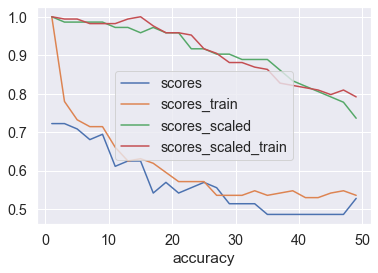

In [35]:
plt.plot(ks, scores, label="scores")
plt.plot(ks, scores_train, label="scores_train")
plt.plot(ks, scores_scaled, label="scores_scaled")
plt.plot(ks, scores_scaled_train, label="scores_scaled_train")
plt.legend()
plt.xlabel("k")
plt.xlabel("accuracy")

Сделайте выводы.

**Вывод** наилучший результат дала модель, в которой данные были отнормированы, при этом оптимальное количество соседей не доолжно быть слишком маленьким или наоборот слишком большим. Здесь это количество соседей n лежит в районе 10. 

### Часть 2 

Теперь скачаем [датасет](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate) о предсказании пульсаров.





Пульсары &mdash; это космические объекты, излучающие в различных диапазонах длины волны. Согласно современным астрофизическим теориям, пульсары представляют собой вращающиеся нейтронные звезды, обладающие магнитным полем, наклоненным относительно оси вращения.

Пульсары представляют значительный научный интерес. Поэтому есть потребность в автоматическом обнаружении интересных объектов для ускорения процесса изучения. На практике почти все обнаружения вызваны радиочастотными помехами и шумом, что затрудняет поиск достоверных сигналов. В последнее время для автоматического обнаружения пульсаров начали применять машинное обучение. Актуальная задача сегодня &mdash; бинарная классификация объектов-кандидатов на предмет того, являются ли они пульсарами.

В используемом датасете есть как примеры ложных обнаружений, так и примеры реальных пульсаров, подтвержденные учеными. Данные получены в результате [The High Time Resolution Universe Pulsar Survey I](https://arxiv.org/abs/1006.5744).

Мы будем работать только с файлом `pulsar_data_train.csv`.

In [36]:
data = pd.read_csv("pulsar_data_train.csv")

Сигнал от пульсаров представляет собой периодические импульсы.

Для описания объекта используется integrated profile (интегральный профиль) &mdash; агрегирование сигнала за разные периоды вращения (<a target="_blank" href="http://ipta.phys.wvu.edu/files/student-week-2017/IPTA2017_KuoLiu_pulsartiming.pdf">ссылка</a>, слайд 11). У всех пульсаров разные интегральные профили, и обычно эта характеристика мало меняется во времени.
В данном датасете интегральный профиль также усреднен по частоте.

Кроме того, импульс приходит в разное время на разных частотах. Задержка от частоты к частоте вызвана наличием ионизированной межзвездной среды и называется дисперсией. Не путать с дисперсией в теории вероятностей.

С дисперсией связана еще одна характеристика объекта &mdash; DM-SNR кривая. Подробнее об этой характеристике можно почитать <a target="_blank" href="https://arxiv.org/pdf/1005.5068.pdf#:~:text=period-DM%20diagram%3B%20good%20agreement,pulsars%20in%20their%20candidate%20plots.)">в специализированных материалах</a>.

Обе характеристики, integrated profile и DM-SNR кривая, представляют собой одномерные функции.
При создании датасета значения функций были посчитаны в конечном количестве $n$ точек.
Фактически, были получены реализации выборки двух случайных величин.

Пусть $P = (p_1, \ldots p_n)$ &mdash; массив значений integrated profile.
Для него можно посчитать следующие статистики:

1.   Выборочное среднее $\bar p = \frac{1}{n}\sum \limits_{i=1}^n p_i$;
2.   Выборочное стандартное отклонение $\sqrt{\frac{1}{n}\sum \limits_{i=1}^n (p_i - \bar p)^2}$;
3. Выборочный коэффициент асимметрии (skewness);
4. Выборочный коэффициент эксцесса (kurtosis).

Для $D = (d_1, \ldots d_n)$, массива значений DM-SNR, аналогично.

Именно эти значения по массивам $P$ и $D$ являются признаками в данном датасете.

Про коэффициенты эксцесса и асимметрии можно посмотреть <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0">здесь</a> и <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B0%D1%81%D0%B8%D0%BC%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%B8">здесь</a>, формулы для выборочных коэффициентов асимметрии и эксцесса можно найти в английской версии этих статей.

<a target="_blank" href="https://arxiv.org/pdf/1603.05166.pdf">Статья</a> с подробным описанием процесса генерации данных.










In [37]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


В этом датасете в некоторых столбцах есть пропуски в данных. Об этом говорит то, что значение Non-Null Count в таблице выше не равно количеству строк для некоторых столбцов. Чтобы не усложнять себе жизнь, пока просто не будем брать эти столбцы для анализа.

Столбец `target_class` отвечает за целевую переменную — индикатор того, является ли объект пульсаром.

In [39]:
needed_columns = [' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve']  # используем только эти столбцы

X = np.array(data[needed_columns])


In [40]:
y = np.array(data['target_class'])

Разделите данные на train и test, установив `test_size=0.15`.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Обучите стандартный классификатор kNN на тренировочных данные. Выведите значения метрик качества на тренировочной и тестовой выборках.

In [42]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(f"accuracy_train {accuracy_score(y_train, model.predict(X_train)) :.4}")
print(f"accuracy_test {accuracy_score(y_test, model.predict(X_test)) :.4}")



accuracy_train 0.9787
accuracy_test 0.9676


Теперь посчитайте долю правильных ответов по каждому классу. Напишите вычисления этих долей самостоятельно. 

Сравните результаты. Одинаково ли хорошо предсказан каждый класс? Сделайте выводы.

In [44]:
n_p = sum(y)
n_s = len(y) - n_p

y_pred = model.predict(X)

s = 0
for i in range (len(y_pred)):
    if (y[i] == y_pred[i] == 0):
        s += 1
x_s = s / n_s

s = 0
for i in range (len(y_pred)):
    if (y[i] == y_pred[i] == 1):
        s += 1
x_p = s / n_p


x_s, x_p

(0.993934065934066, 0.8100607111882047)

Подберите оптимальное число соседей с использованием метрики accuracy. Сделайте выводы.

In [49]:
ks = np.arange(1, 51, 1)  
models = [KNeighborsClassifier(n_neighbors=k) for k in ks]  
for model in models:
    model.fit(X_train, y_train)
scores = [accuracy_score(y_test, elem.predict(X_test)) for elem in models] 
print(scores.index(max(scores)) + 1)



8


Дополнительно можно почитать о классификации пульсаров, например, в <a target="_blank" href="https://medium.com/duke-ai-society-blog/classifying-pulsar-stars-using-ai-techniques-d2be70c0f691">этой статье</a>.

**Вывод:** мы опять убедились в том, что наиболее хорошая модель получится, если брать не очень большое, и не очень маленькое количество соседей. В этом примере получилось, что наиболее точный результат при количестве соседей n = 8.